In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/Datathon/Data'

/content/gdrive/.shortcut-targets-by-id/1KAt26RbjXVUTFl0HeTcsLK0FcXRAYiWe/Datathon/Data


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
low_df_cleaned = pd.read_csv('low_df_cleaned.tsv', sep="\t")

In [ ]:
high_df_cleaned = pd.read_csv('high_df_cleaned.tsv', sep="\t")

In [ ]:
low_df_cleaned

,Unnamed: 0,loan_amnt,int_rate,grade,sub_grade,zip_code,dti,fed,dow,sp,treasury,unrate,vix,avg_sentiment,minor_categories,major_categories,fico_range_avg,hardship_flag_num,grade_num
0,1,24700.0,11.99,C,C1,577.0,16.06,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,18,2,717.0,0,2
1,2,20000.0,10.78,B,B4,605.0,10.78,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,11,7,697.0,0,1
2,4,10400.0,22.45,F,F1,174.0,25.37,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,76,2,697.0,0,5
3,6,20000.0,9.17,B,B2,550.0,14.67,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,472,1,682.0,0,1
4,7,20000.0,8.49,B,B1,293.0,17.61,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,249,7,707.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277604,1877338,24000.0,12.79,C,C1,356.0,19.61,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,308,7,667.0,0,2
1277605,1877339,24000.0,10.49,B,B3,840.0,34.94,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,190,1,697.0,0,1
1277606,1877340,40000.0,10.49,B,B3,907.0,12.75,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,179,1,707.0,0,1
1277607,1877341,24000.0,14.49,C,C4,334.0,18.30,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,188,1,662.0,0,2


In [ ]:
df_cleaned = pd.read_csv('df_cleaned_with_fico.tsv', sep="\t")

In [ ]:
df_cleaned['loan_amnt'].median()

13500.0

In [ ]:
new_table = pd.read_csv('new_table.tsv', sep="\t")

In [ ]:
df_cleaned_purposes = pd.read_csv('df_cleaned_purposes.tsv', sep="\t")

In [ ]:
cleaned_loan_amnt = [x > 13500 for x in df_cleaned['loan_amnt']]

In [ ]:
cleaned_loan_amnt[:5]

[True, True, True, False, True]

In [ ]:
df_cleaned[:5]

,loan_amnt,int_rate,grade,sub_grade,zip_code,dti,fed,dow,sp,treasury,unrate,vix,avg_sentiment,minor_categories,major_categories,fico_range_avg,hardship_flag_num
0,24700.0,11.99,C,C1,577,16.06,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,18,2,717.0,0
1,20000.0,10.78,B,B4,605,10.78,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,11,7,697.0,0
2,35000.0,14.85,C,C5,76,17.06,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,211,2,787.0,0
3,10400.0,22.45,F,F1,174,25.37,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,76,2,697.0,0
4,20000.0,9.17,B,B2,550,14.67,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,472,1,682.0,0


In [ ]:
df_cleaned['clean_loan'] = cleaned_loan_amnt

In [ ]:
low_df_cleaned['clean_loan'] = [x > 13500 for x in low_df_cleaned['loan_amnt']]

###EDA

In [ ]:
max(low_df_cleaned['dti'])

999.0

In [ ]:
max(high_df_cleaned['dti'])

999.0

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# x = low_df_cleaned['dti']
# plt.xlim(0, 1000)
# plt.hist(x, bins=1000)


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# x = high_df_cleaned['dti']
# plt.xlim(0, 1000)
# plt.hist(x, bins=500)


In [ ]:
df_cleaned = pd.read_csv('df_cleaned_with_fico.tsv', sep="\t")

In [ ]:
df_cleaned.head(5)

,loan_amnt,int_rate,grade,sub_grade,zip_code,dti,fed,dow,sp,treasury,unrate,vix,avg_sentiment,minor_categories,major_categories,fico_range_avg,hardship_flag_num
0,24700.0,11.99,C,C1,577,16.06,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,18,2,717.0,0
1,20000.0,10.78,B,B4,605,10.78,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,11,7,697.0,0
2,35000.0,14.85,C,C5,76,17.06,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,211,2,787.0,0
3,10400.0,22.45,F,F1,174,25.37,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,76,2,697.0,0
4,20000.0,9.17,B,B2,550,14.67,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,472,1,682.0,0


In [ ]:
df_cleaned['grade_num'] = [ord(x) - 64 for x in df_cleaned.grade]

In [ ]:
df_cleaned.sort_values(by = 'grade')

,loan_amnt,int_rate,grade,sub_grade,zip_code,dti,fed,dow,sp,treasury,unrate,vix,avg_sentiment,minor_categories,major_categories,fico_range_avg,hardship_flag_num,grade_num
792975,24000.0,5.32,A,A1,275,12.23,0.36,16865.08,1978.35,0.98,5.0,17.70,0.048957,35,3,792.0,0,1
1243406,18000.0,6.07,A,A2,333,18.66,1.69,23644.19,2581.88,0.48,4.0,23.62,0.050069,148,1,752.0,0,1
1243410,24000.0,7.96,A,A5,31,25.17,1.69,23644.19,2581.88,0.48,4.0,23.62,0.050069,65,2,737.0,0,1
1243414,15000.0,7.96,A,A5,531,24.62,1.69,23644.19,2581.88,0.48,4.0,23.62,0.050069,46,4,702.0,0,1
1243416,4500.0,5.31,A,A1,740,15.32,1.69,23644.19,2581.88,0.48,4.0,23.62,0.050069,269,4,772.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980199,34625.0,25.89,G,G3,63,15.85,0.09,16558.87,1883.68,2.22,6.3,13.25,0.043745,344,2,667.0,0,7
95555,20000.0,27.31,G,G2,451,11.23,0.12,16272.01,1923.82,1.41,5.0,22.55,0.050540,208,1,667.0,0,7
1522740,17400.0,30.79,G,G1,774,31.43,0.54,19191.93,2191.08,1.31,4.7,14.07,0.052304,5,1,707.0,0,7
184232,34000.0,28.99,G,G5,785,26.87,0.13,17757.91,2077.42,1.74,5.2,16.09,0.053364,26,1,682.0,0,7


In [ ]:
df_cleaned.groupby('major_categories').mean()

,loan_amnt,int_rate,zip_code,dti,fed,dow,sp,treasury,unrate,vix,avg_sentiment,minor_categories,fico_range_avg,hardship_flag_num,grade_num
major_categories,,,,,,,,,,,,,,,
1,16825.460016,12.837745,508.588415,18.298625,0.765629,20064.283702,2285.337019,1.081178,4.765758,14.826788,0.050525,160.436176,700.794766,0.000394,2.618570
2,16093.992718,12.568470,506.696862,18.922496,0.748962,19981.595941,2277.065973,1.098902,4.790293,14.856222,0.050520,166.875040,702.135030,0.000437,2.551457
3,14087.811862,13.223563,506.513621,19.195155,0.776788,20116.841979,2289.908455,1.078384,4.762767,14.801113,0.050503,218.077932,698.882046,0.000425,2.712651
4,13418.319978,13.322480,514.100813,19.807841,0.773824,20100.513723,2288.348605,1.080945,4.765862,14.815114,0.050515,231.860822,698.880225,0.000396,2.739081
5,13057.469437,13.319188,512.236118,19.098953,0.787769,20170.371884,2294.753122,1.068295,4.752361,14.801603,0.050477,194.099579,697.946775,0.000406,2.736268
6,14225.606319,13.473045,512.129150,18.277106,0.825188,20340.724682,2310.436431,1.042762,4.717872,14.781384,0.050458,180.958985,697.688311,0.000346,2.768647
7,13422.899827,13.729653,504.446557,18.929421,0.824488,20335.963460,2310.314266,1.040485,4.714567,14.779064,0.050446,137.693142,697.108508,0.000398,2.831518
8,12697.779965,13.601064,496.265686,19.155618,0.831894,20384.927109,2314.802158,1.039145,4.707983,14.775990,0.050542,253.539401,698.088270,0.000312,2.800869
9,15856.898200,13.375530,490.172159,19.359392,0.756582,20005.988905,2278.801223,1.093184,4.787911,14.873449,0.050414,209.410597,699.645068,0.000656,2.760992


In [ ]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [ ]:
df_cleaned.groupby('minor_categories').mean()

,loan_amnt,int_rate,zip_code,dti,fed,dow,sp,treasury,unrate,vix,avg_sentiment,major_categories,fico_range_avg,hardship_flag_num,grade_num
minor_categories,,,,,,,,,,,,,,,
1,16453.166793,13.029049,493.041887,18.528335,0.738506,19923.153126,2272.471128,1.098047,4.794499,14.818423,0.050442,1.0,700.246404,0.000757,2.672723
2,12979.232169,13.167000,485.718021,18.661158,0.785156,20172.662186,2294.568909,1.077028,4.765481,14.776503,0.050406,3.0,700.272381,0.000000,2.698163
3,17020.304673,12.675427,519.656116,18.878469,0.768192,20053.512700,2283.426319,1.089885,4.776546,14.839798,0.050343,2.0,700.545245,0.000364,2.568449
5,15500.107743,13.173685,496.445835,18.456227,0.775459,20113.817735,2289.641363,1.075167,4.756984,14.849495,0.050567,1.0,699.409851,0.000269,2.701112
6,14530.481451,12.758745,496.736481,21.118451,0.759290,20023.316747,2281.371606,1.093172,4.778928,14.783306,0.050537,2.0,701.825247,0.000372,2.597628
7,14791.422484,12.989939,518.732197,17.987251,0.741490,19976.773084,2276.723341,1.094733,4.784421,14.818432,0.050607,5.0,697.801541,0.000525,2.660752
8,16537.226289,12.565718,518.322897,19.295174,0.724372,19864.294880,2266.477959,1.110450,4.805209,14.832146,0.050496,2.0,700.460390,0.000327,2.556115
10,15325.736419,13.233169,483.565800,18.499973,0.760570,20018.565187,2281.652883,1.088556,4.776836,14.875228,0.050457,3.0,698.914786,0.000765,2.722073
11,14516.129100,13.757396,497.903872,18.546188,0.858276,20485.509307,2323.771334,1.022028,4.690362,14.791316,0.050467,7.0,696.668625,0.000592,2.831502


In [ ]:
df_cleaned.groupby('minor_categories')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
minor_categories,,,,,,,,
1,3963.0,16453.166793,9754.687101,1000.0,9000.00,15000.0,24000.00,40000.0
2,6043.0,12979.232169,8569.719774,1000.0,6100.00,10400.0,17287.50,40000.0
3,21958.0,17020.304673,9324.649480,1000.0,10000.00,15000.0,24000.00,40000.0
5,40838.0,15500.107743,9207.634442,1000.0,8400.00,14000.0,20000.00,40000.0
6,42995.0,14530.481451,8790.031585,1000.0,8000.00,12500.0,20000.00,40000.0
7,17132.0,14791.422484,9000.363331,1000.0,8000.00,12325.0,20000.00,40000.0
8,15299.0,16537.226289,9223.391565,1000.0,10000.00,15000.0,22525.00,40000.0
10,5228.0,15325.736419,8807.863470,1000.0,8500.00,14000.0,20000.00,40000.0
11,11828.0,14516.129100,8443.406300,1000.0,8000.00,12100.0,20000.00,40000.0


In [ ]:
df_cleaned.groupby('major_categories').mean()

,loan_amnt,int_rate,zip_code,dti,fed,dow,sp,treasury,unrate,vix,avg_sentiment,minor_categories,fico_range_avg,hardship_flag_num,grade_num
major_categories,,,,,,,,,,,,,,,
1,16825.460016,12.837745,508.588415,18.298625,0.765629,20064.283702,2285.337019,1.081178,4.765758,14.826788,0.050525,160.436176,700.794766,0.000394,2.618570
2,16093.992718,12.568470,506.696862,18.922496,0.748962,19981.595941,2277.065973,1.098902,4.790293,14.856222,0.050520,166.875040,702.135030,0.000437,2.551457
3,14087.811862,13.223563,506.513621,19.195155,0.776788,20116.841979,2289.908455,1.078384,4.762767,14.801113,0.050503,218.077932,698.882046,0.000425,2.712651
4,13418.319978,13.322480,514.100813,19.807841,0.773824,20100.513723,2288.348605,1.080945,4.765862,14.815114,0.050515,231.860822,698.880225,0.000396,2.739081
5,13057.469437,13.319188,512.236118,19.098953,0.787769,20170.371884,2294.753122,1.068295,4.752361,14.801603,0.050477,194.099579,697.946775,0.000406,2.736268
6,14225.606319,13.473045,512.129150,18.277106,0.825188,20340.724682,2310.436431,1.042762,4.717872,14.781384,0.050458,180.958985,697.688311,0.000346,2.768647
7,13422.899827,13.729653,504.446557,18.929421,0.824488,20335.963460,2310.314266,1.040485,4.714567,14.779064,0.050446,137.693142,697.108508,0.000398,2.831518
8,12697.779965,13.601064,496.265686,19.155618,0.831894,20384.927109,2314.802158,1.039145,4.707983,14.775990,0.050542,253.539401,698.088270,0.000312,2.800869
9,15856.898200,13.375530,490.172159,19.359392,0.756582,20005.988905,2278.801223,1.093184,4.787911,14.873449,0.050414,209.410597,699.645068,0.000656,2.760992


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e3fa44c90>]],
      dtype=object)

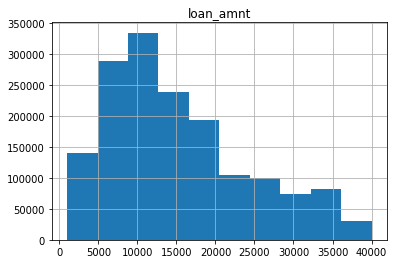

In [ ]:
df_cleaned.hist(column="loan_amnt")

In [ ]:
to_name = {

    0: "Kitchen / Cleaning",
    1: "Project Management",
    2: "Associate Position",
    3: "Registered Nurse",
    4: "-",
    5: "Manager",
    6: "Teacher",
    7: "Sales",
    8: "RN",
    9: "Misc",
    10: "Executive Assistant",
    11: "Truck Driver",
    12: "Systems Analyst",
    13: "Electrician",
    14: "Supervisor",
    15: "Owner",
    16: "Server",
    17: "Manager",
    18: "Engineer",
    19: "Technician",
    20: "Corrections Officer",
    21: "Attorney",
    22: "Manufacturing",
    23: "Account Manager",
    24: "Customer Service",
    25: "Managing Director",
    26: "Superintendent",
    27: "Vice President",
    28: "Nurse",
    29: "/",
    30: "General Manager",
    31: "Office Manager",
    32: "Tech",
    33: "Coordinator",
    34: "Controller",
    35: "Assistant Director",
    36: "Machine Operator",
    37: "Police Officer",
    38: "Software Engineer",
    39: "Accountant",
    40: "Foreman",
    41: "President",
    42: "Supply Chain Logistics",
    43: "Mechanic",
    44: "Analyst",
    45: "Service Rep",
    46: "Clerk",
    47: "Project Manager",
    48: "Cashier",
    49: "Underwriter",
    50: "Pharmacist",
    51: "Specialized Secretary",
    52: "Laborer",
    53: "Specialist",
    54: "Operations Manager",
    55: "Waitress",
    56: "Production Supervisor",
    57: "Driver",
    58: "IT Manager",
    59: "Store Manager",
    60: "Installer",
    61: "Letter Carrier",
    62: "Administrator",
    63: "Consultant",
    64: "Assistant Manager",
    65: "School Counselor",
    66: "Chef",
    67: "Director",
    68: "Processor",
    69: "Medical Tech",
    70: "Supervisor",
    71: "CNA",
    72: "Sales Agent",
    73: "Estimator",
    74: "Assembly Line",
    75: "Auditor",
    76: "Specialist",
    77: "Firefighter",
    78: "Receptionist",
    79: "Machinist",
    80: "Flight Attendant",
    81: "Administrative Assistant",
    82: "Operator",
    83: "Leader",
    84: "Director",
    85: "Accounting",
    86: "LPN",
    87: "CEO",
    88: "Social Worker",
    89: "Foreman",
    90: "Business Manager",
    91: "Director",
    92: "Designer",
    93: "HR",
    94: "Paralegal",
    95: "Military",
    96: "Maintenance",
    97: "Analyst",
    98: "Manager",
    99: "Warehouse Supervisor",
    100: "Dietitian",
    101: "Massage therapist",
    102: "CSR",
    103: "Purchasing",
    104: "Associate Director",
    105: "Truck driver",
    106: "Instructor",
    107: "Plumber",
    108: "Claims Adjuster",
    109: "Software Engineer",
    110: "Banker",
    111: "Head _",
    112: "Account Executive",
    113: "Seargent",
    114: "Staff Nurse",
    115: "Professor",
    116: "Accounting Clerk",
    117: "Coordinator",
    118: "GM",
    119: "Management",
    120: "Carpenter",
    121: "Caregiver",
    122: "Broker",
    123: "COO / CEO",
    124: "Physician",
    125: "Leader",
    126: "Investigator",
    127: "Accountant",
    128: "Dental hygienist",
    129: "Courier",
    130: "Executive",
    131: "Office staff",
    132: "Maintenance",
    133: "Medical biller",
    134: "Technical Support",
    135: "Senior Advisor / Manager",
    136: "Fire Captain",
    137: "Medical Assistant",
    138: "Painter",
    139: "Housekeeping",
    140: "HR Manager",
    141: "Academic Advisor",
    142: "Realtor",
    143: "Sales manager",
    144: "Laborer",
    145: "Custodian",
    146: "Officer",
    147: "Counselor",
    148: "Environmental Manager",
    149: "Network engineer",
    150: "CNA",
    151: "Treasurer",
    152: "Assembler",
    153: "Insurance underwriter",
    154: "Patient Care Tech",
    155: "Chief ___",
    156: "Branch manager",
    157: "QA",
    158: "Secretary",
    159: "Buyer",
    160: "Shipping",
    161: "Production Operator",
    162: "Warehouse Manager",
    163: "Consultant",
    164: "Welder",
    165: "Basic Work",
    166: "Cook",
    167: "Security Work",
    168: "Technician",
    169: "Teller",
    170: "Partner",
    171: "Bus Operator",
    172: "Educator",
    173: "Security Guard",
    174: "Lead __",
    175: "Material handler",
    176: "Mail handler",
    177: "Senior __",
    178: "Basic Work",
    179: "Vice President",
    180: "Executive",
    181: "Trainer",
    182: "Sales Representative",
    183: "Tech",
    184: "SVP",
    185: "CFO",
    186: "Designer",
    187: "Business Operations Associate",
    188: "Program Manager",
    189: "Accounts Specialist",
    190: "Administrator",
    191: "Detective",
    192: "Production Associate",
    193: "Correctional Officer",
    194: "Dispatch",
    195: "Physical Therapist",
    196: "Conductor",
    197: "Operator",
    198: "Stylist",
    199: "Judge",
    200: "Server",
    201: "Researcher",
    202: "Administration",
    203: "District Manager",
    204: "Business Analyst",
    205: "Logistical",
    206: "Administrator",
    207: "VP",
    208: "Manager",
    209: "QC Inspector",
    210: "Clinicial Work",
    211: "Information Technology",
    212: "Respiratory Therapist",
    213: "__ Lead",
    214: "Dealer",
    215: "Owner",
    216: "Tax Manager",
    217: "Stocker",
    218: "Nurse Practitioner",
    219: "Journeyman Mechanic",
    220: "LVN",
    221: "Real Estate",
    222: "Processor",
    223: "Scientist",
    224: "Recruiter",
    225: "Transportation",
    226: "Phlebotomist",
    227: "Salesman",
    228: "Programmer",
    229: "Warehouse",
    230: "Dietitian",
    231: "Manager",
    232: "Data Entry",
    233: "Bookkeeper",
    234: "CPA",
    235: "Sales",
    236: "Editor",
    237: "Pastor",
    238: "Property Management",
    239: "Manager",
    240: "Software Developer",
    241: "COO",
    242: "Aide",
    243: "Agent",
    244: "Bartender",
    245: "Inspector",
    246: "Dealer",
    247: "Sales Representative",
    248: "Facility Manager",
    249: "Bus Driver",
    250: "Regional Manager",
    251: "Operations",
    252: "Professor",
    253: "Health Care Consultant",
    254: "Member",
    255: "Director of Finance",
    256: "Paramedic",
    257: "Manager",
    258: "Solutions Architect",
    259: "Maintenance Supervisor",
    260: "Mortgage",
    261: "Engineering",
    262: "Veterinarian",
    263: "Auditor",
    264: "Lender",
    265: "HR",
    266: "Service Tech",
    267: "Senior ___",
    268: "Millwright",
    269: "Scheduler",
    270: "Merchandiser",
    271: "Nanny",
    272: "Nurse",
    273: "Mail Carrier",
    274: "Security",
    275: "Accounting Manager",
    276: "Assistant",
    277: "Executive ___",
    278: "Officer",
    279: "Coordinator",
    280: "Mechanical Engineer",
    281: "Loader",
    282: "Staff Accountant",
    283: "Analyst",
    284: "Coordinator",
    285: "HVAC",
    286: "Concierge",
    287: "Principal",
    288: "Auto Parts",
    289: "QA Manager",
    290: "Printer",
    291: "Senior __",
    292: "CNC",
    293: "E-6",
    294: "Clerical",
    295: "Faculty",
    296: "Misc",
    297: "Juvenile Probation Officer",
    298: "Lab Coordinator",
    299: "Reporter",
    300: "Product Support",
    301: "Therapist",
    302: "Associate Professor",
    303: "PCT",
    304: "Dispatcher",
    305: "Clinical Manager",
    306: "Deputy Sheriff",
    307: "Marketing",
    308: "Plant Operator",
    309: "Trooper",
    310: "Director",
    311: "Director",
    312: "Pathologist",
    313: "Pilot",
    314: "Planner",
    315: "Product engineer",
    316: "Systems Engineer",
    317: "Developer",
    318: "Field engineer",
    319: "Field Service Tech",
    320: "Admin Asst",
    321: "Web Developer",
    322: "Billing",
    323: "Insturctor",
    324: "Banker",
    325: "E4 - E5",
    326: "CRNA",
    327: "CSA",
    328: "Highway Patrol",
    329: "E6-E8",
    330: "Captain",
    331: "Receiver",
    332: "Producer",
    333: "Speech Pathologist",
    334: "Utility Worker",
    335: "Manager",
    336: "Meat Packer",
    337: "Grinder",
    338: "Data Analyst",
    339: "Service Advisor",
    340: "Production",
    341: "IT",
    342: "Financial Analyst",
    343: "Sales Manager",
    344: "Industrial Engineering",
    345: "Regional Director",
    346: "EMT",
    347: "Graphic design",
    348: "Pipefitter",
    349: "Misc",
    350: "Caseworker",
    351: "Front Desk",
    352: "Senior Business Analyst",
    353: "Sales Director",
    354: "Worker",
    355: "Specialist",
    356: "Loan Officer",
    357: "Technical Writer",
    358: "Occupational Therapist",
    359: "Financial Rep",
    360: "Inventory",
    361: "Misc",
    362: "Doorman",
    363: "Legal Assistant",
    364: "Operations Supervisor",
    365: "Insurance Agent",
    366: "Payroll",
    367: "Coach",
    368: "Personal Banker",
    369: "Technical Trainer",
    370: "Pastor",
    371: "Psychologist",
    372: "Barber",
    373: "Manager",
    374: "Service",
    375: "Building Inspector",
    376: "Miner",
    377: "Paraprofessional",
    378: "Claims",
    379: "Cable splicer",
    380: "Carrier",
    381: "Territory Manager",
    382: "Security Officer",
    383: "Services",
    384: "Sales",
    385: "Sales",
    386: "Construction",
    387: "VP",
    388: "Comptroller",
    389: "General __",
    390: "Electrical Engineer",
    391: "Business",
    392: "Delivery Driver",
    393: "Biller",
    394: "Case Manager",
    395: "#",
    396: "Librarian",
    397: "Pressman",
    398: "Military",
    399: "Gate Technician",
    400: "Consultant",
    401: "PM",
    402: "Manager",
    403: "Air Traffic",
    404: "Administrator",
    405: " Professional",
    406: "Plant Manager",
    407: "Office Clerk",
    408: "E-7",
    409: "Esthetician",
    410: "Carrier",
    411: "Hairstylist",
    412: "Master Tradesman",
    413: "Registrar",
    414: "Owner",
    415: "Safety",
    416: "AVP",
    417: "Pharm Technician",
    418: "Contractor",
    419: "Chemist",
    420: "Baker",
    421: "Stylist",
    422: "Admissions",
    423: "Warehouseman",
    424: "Packer",
    425: "Production Manager",
    426: "Logistics Coordinator",
    427: "Tax Examiner",
    428: "Director of Operations",
    429: "Truck Driver",
    430: "Communications",
    431: "Foreman",
    432: "RN",
    433: "Architect",
    434: "Clerk",
    435: "Housekeeper",
    436: "Foreman",
    437: "RN manager",
    438: "Safety",
    439: "Administrator",
    440: "E-4 / E-5",
    441: "CIO",
    442: "Coder",
    443: "PCA",
    444: "Collection Specialist",
    445: "Lineman",
    446: "Manager",
    447: "Finance",
    448: "Manager",
    449: "Artist / Musician",
    450: "Analyst",
    451: "Process Associate",
    452: "Dentist / PHysician",
    453: "MRI Tech",
    454: "Dental Assistant",
    455: "Accounts Rep",
    456: "Substitute Teacher",
    457: "CTO",
    458: "Accounts Payable",
    459: "Mechanic",
    460: "Technician",
    461: "Physician Assistant",
    462: "Computer",
    463: "Insulator",
    464: "House cleaning",
    465: "Senior Director",
    466: "Construction",
    467: "Porter",
    468: "Food Service",
    469: "Manager",
    470: "Line cook",
    471: "Appraiser",
    472: "President / VP",
    473: "Poker dealer",
    474: "Correction Officer",
    475: "Loan Operator",
    476: "Records Clerk",
    477: "Aircraft Mechanic",
    478: "Sales",
    479: "Attorney",
    480: "PTA",
    481: "HHA",
    482: "Manager",
    483: "Teacher",
    484: "Coordinator",
    485: "Technician",
    486: "Pharm Technician",
    487: "Fabricator",
    488: "Seargent",
    489: "Accounting",
    490: "Network Admin",
    491: "VP",
    492: "Controller",
    493: "Deputy _",
    494: "Press",
    495: "Misc",
    496: "Police",
    497: "Food Service",
    498: "Manager",
    499: "Team Lead" 
}

In [ ]:
df_cleaned['minor_categories_names'] = [to_name[x] for x in df_cleaned['minor_categories']]

In [ ]:
df_plot = df_cleaned[['loan_amnt', 'minor_categories', 'minor_categories_names']]

In [ ]:
df_plot_1 = df_plot[df_plot['minor_categories'] <= 50]

In [ ]:
len(df_plot_1)

435439

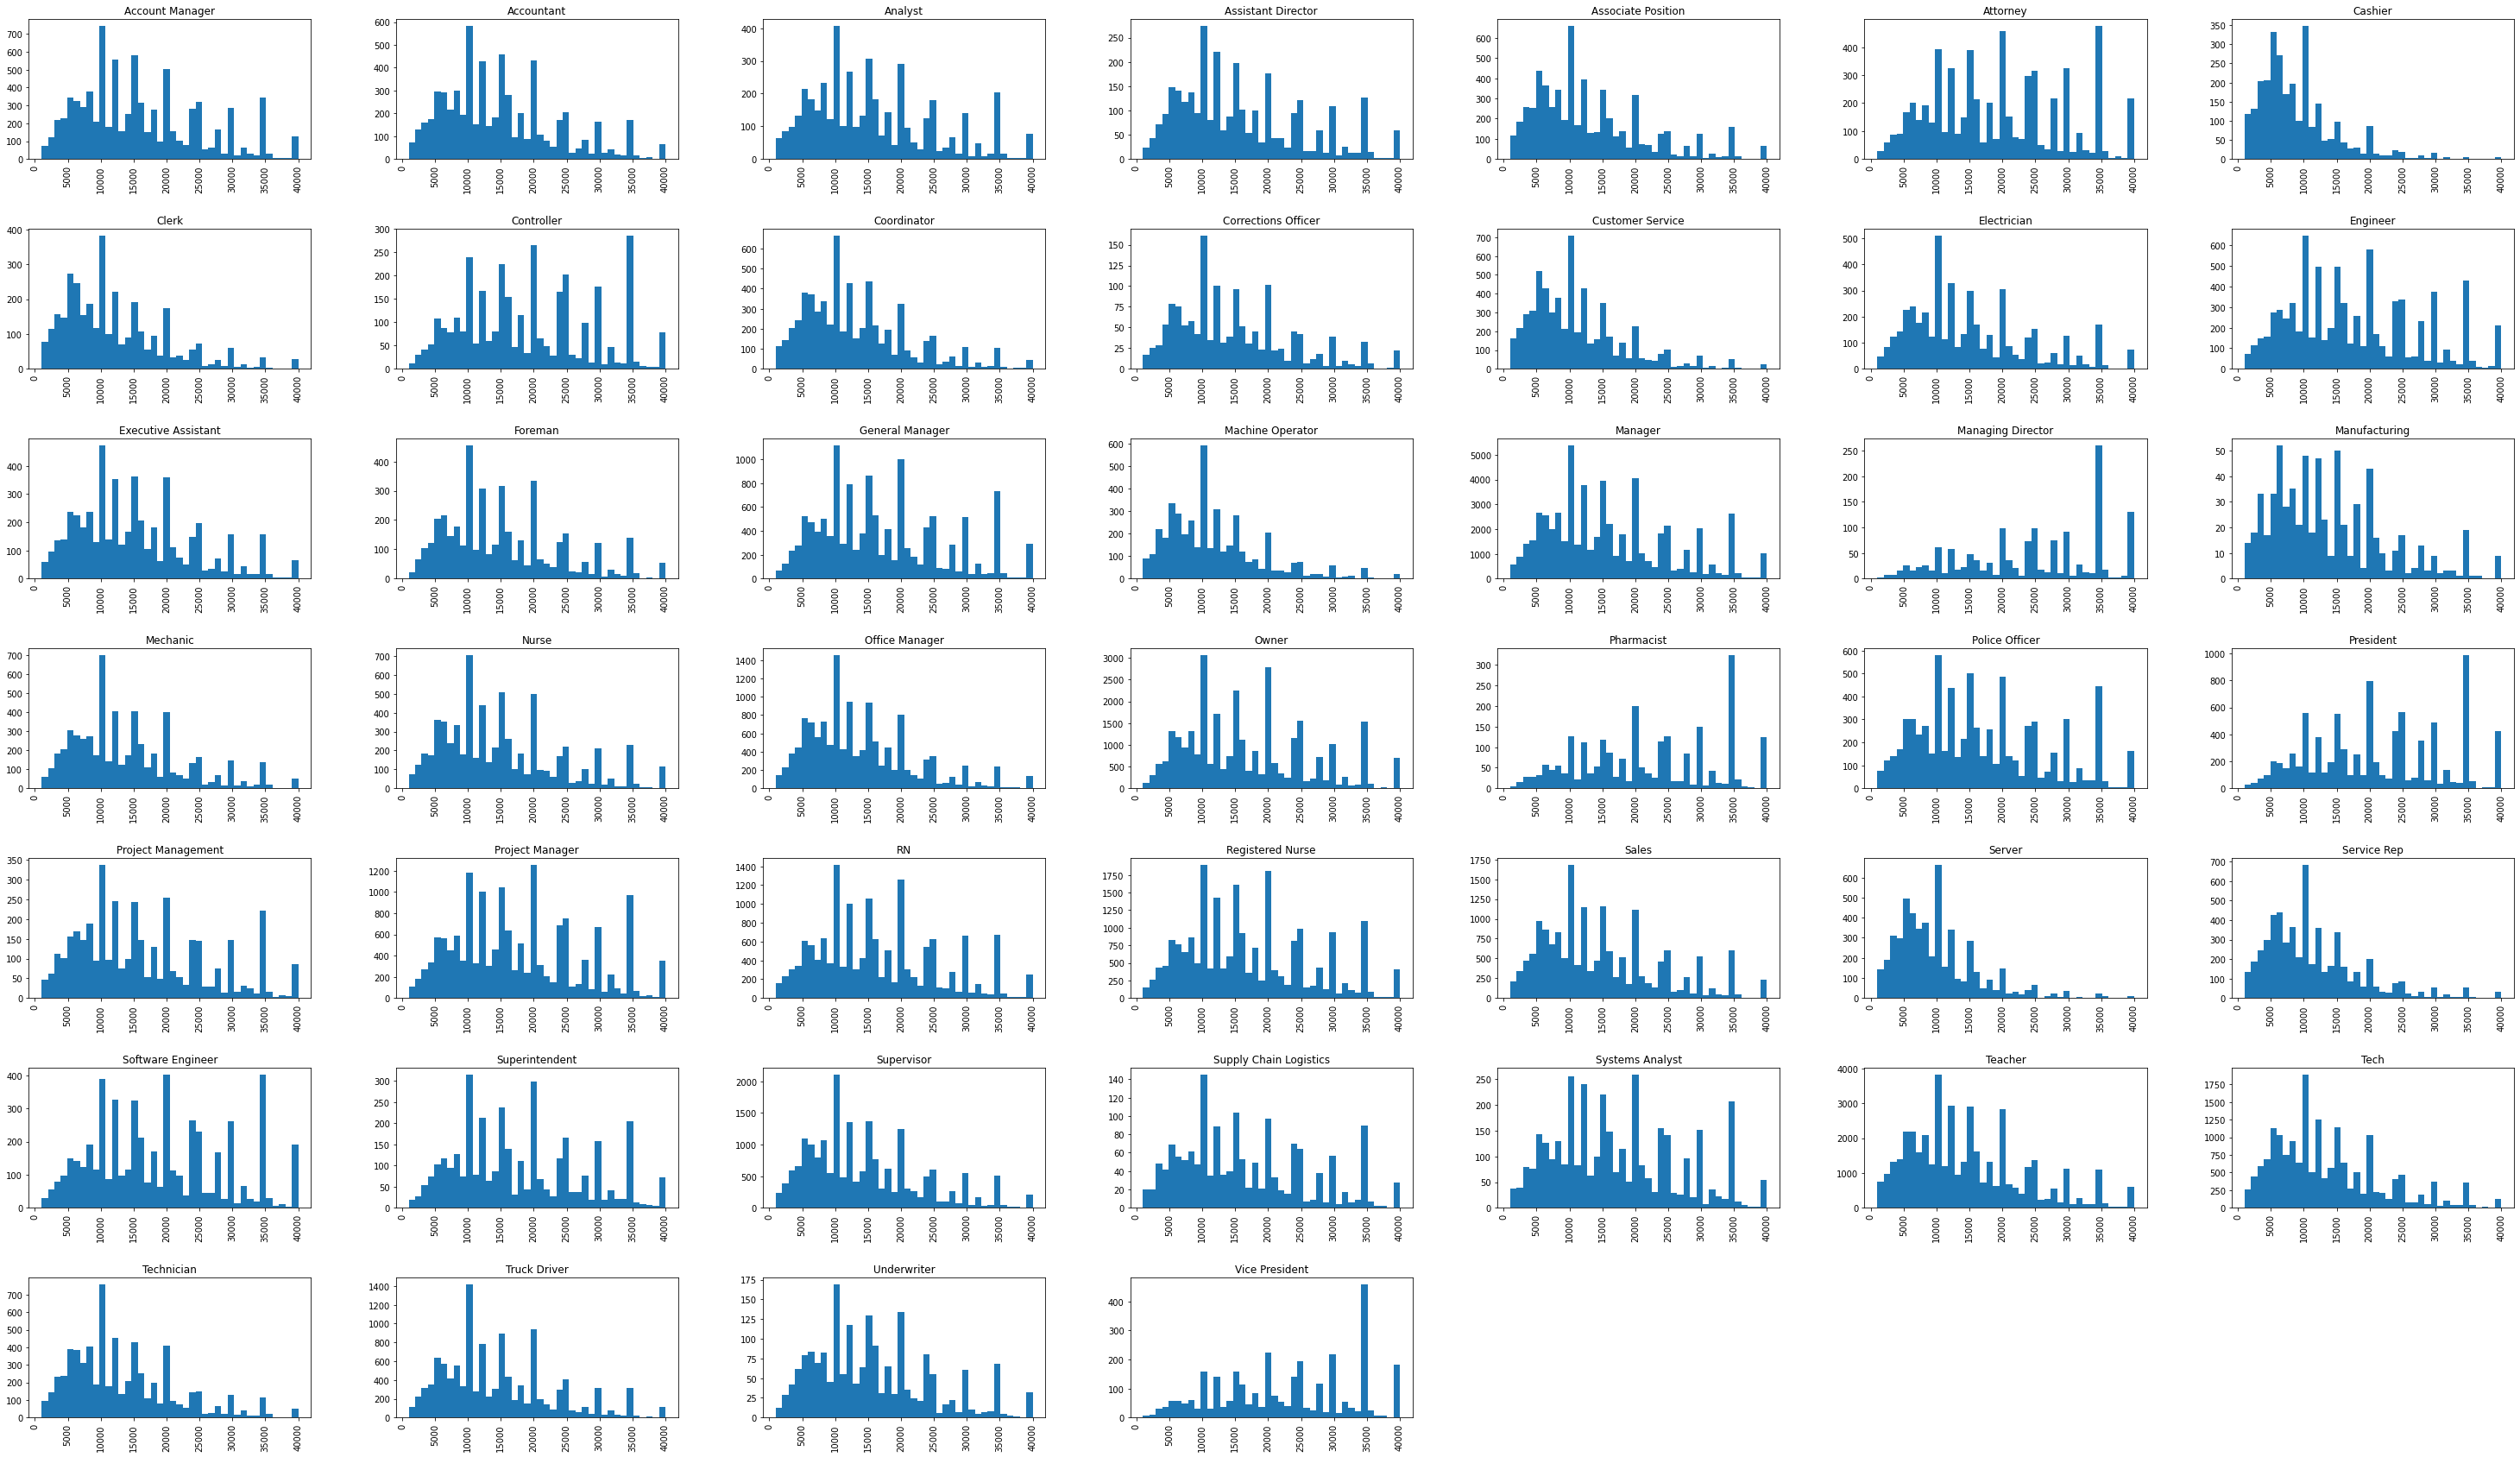

In [ ]:

ax = df_plot_1.hist(column="loan_amnt", by="minor_categories_names", figsize=(50, 30), bins=40)

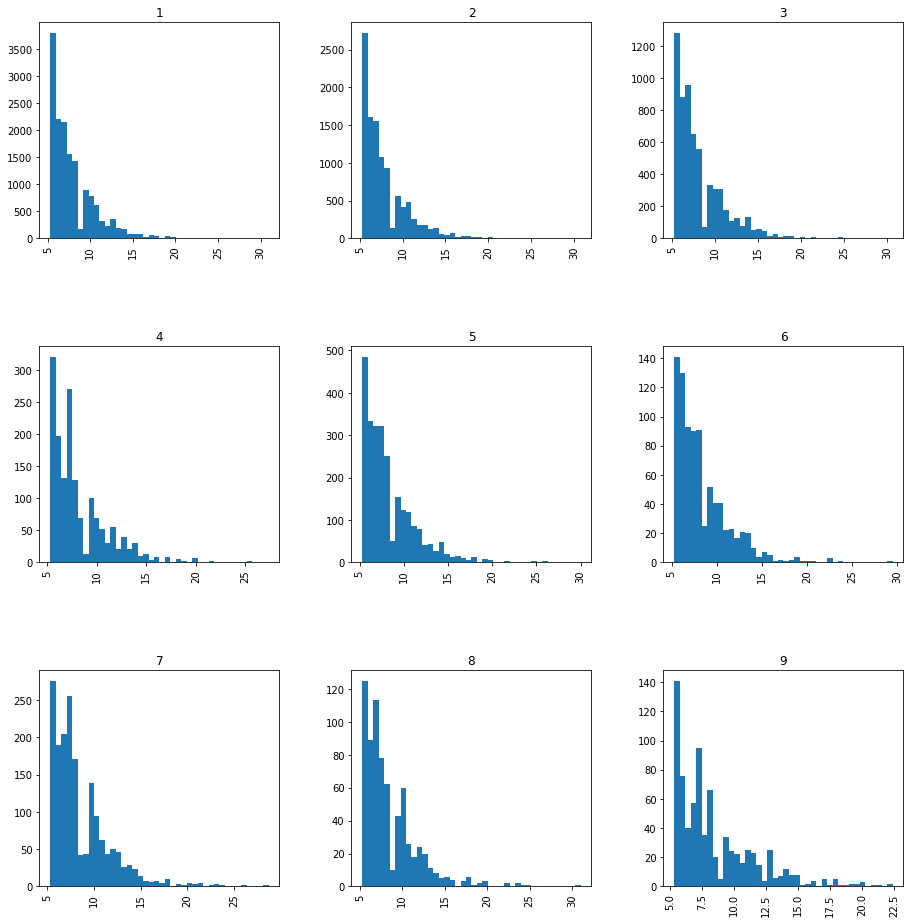

In [ ]:
ax = high_df_cleaned.hist(column="int_rate", by="major_categories", figsize=(15, 16), bins=40)

In [ ]:
x = df_cleaned[df_cleaned['major_categories'] == 1]

In [ ]:
x

,loan_amnt,int_rate,grade,sub_grade,zip_code,dti,fed,dow,sp,treasury,unrate,vix,avg_sentiment,minor_categories,major_categories,fico_range_avg,hardship_flag_num,grade_num
4,20000.0,9.17,B,B2,550,14.67,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,472,1,682.0,0,2
6,10000.0,6.49,A,A2,160,13.07,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,257,1,687.0,0,1
7,22400.0,12.88,C,C2,290,22.98,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,180,1,712.0,0,3
8,16000.0,12.88,C,C2,786,26.40,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,291,1,722.0,0,3
9,1400.0,12.88,C,C2,275,34.95,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,98,1,702.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585943,32000.0,14.49,C,C4,863,10.34,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,143,1,737.0,0,3
1585944,16000.0,12.79,C,C1,284,12.25,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,5,1,667.0,0,3
1585947,24000.0,10.49,B,B3,840,34.94,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,190,1,697.0,0,2
1585948,40000.0,10.49,B,B3,907,12.75,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,179,1,707.0,0,2


In [ ]:
n = 10
(x['loan_amnt'].value_counts())


10000.0    42546
20000.0    37339
15000.0    32406
35000.0    31405
12000.0    30304
           ...  
36925.0        1
38625.0        1
36275.0        1
39375.0        1
38350.0        1
Name: loan_amnt, Length: 1559, dtype: int64

In [ ]:
x['loan_amnt']

4          20000.0
6          10000.0
7          22400.0
8          16000.0
9           1400.0
            ...   
1585943    32000.0
1585944    16000.0
1585947    24000.0
1585948    40000.0
1585949    24000.0
Name: loan_amnt, Length: 571719, dtype: float64

(array([1.5910e+03, 0.0000e+00, 4.0000e+00, ..., 7.0000e+00, 0.0000e+00,
        1.2503e+04]),
 array([ 1000.  ,  1009.75,  1019.5 , ..., 39980.5 , 39990.25, 40000.  ]),
 <a list of 4000 Patch objects>)

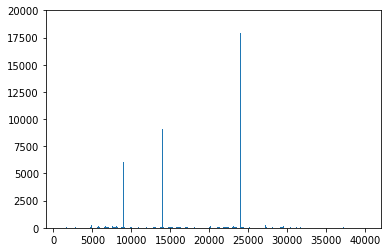

In [ ]:

plt.ylim(0, 20000)
plt.hist(x['loan_amnt'], bins=4000)



In [ ]:
len(x)

10000

###Code

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import plot_confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import sklearn

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


####Predicting Loan Amount

In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
sample_df = df_cleaned

In [ ]:
df_cleaned

,loan_amnt,int_rate,grade,sub_grade,zip_code,dti,fed,dow,sp,treasury,unrate,vix,avg_sentiment,minor_categories,major_categories,fico_range_avg,hardship_flag_num,clean_loan
0,24700.0,11.99,C,C1,577,16.06,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,18,2,717.0,0,True
1,20000.0,10.78,B,B4,605,10.78,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,11,7,697.0,0,True
2,35000.0,14.85,C,C5,76,17.06,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,211,2,787.0,0,True
3,10400.0,22.45,F,F1,174,25.37,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,76,2,697.0,0,False
4,20000.0,9.17,B,B2,550,14.67,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,472,1,682.0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585946,24000.0,12.79,C,C1,356,19.61,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,308,7,667.0,0,True
1585947,24000.0,10.49,B,B3,840,34.94,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,190,1,697.0,0,True
1585948,40000.0,10.49,B,B3,907,12.75,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,179,1,707.0,0,True
1585949,24000.0,14.49,C,C4,334,18.30,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,188,1,662.0,0,True


In [ ]:
X = sample_df[['zip_code', 'dti', 'fed', 'dow', 'sp', 'treasury', 'unrate', 'vix', 'avg_sentiment', 'major_categories', 'fico_range_avg', 'hardship_flag_num']]
y = sample_df['clean_loan']

In [ ]:
X

,zip_code,dti,fed,dow,sp,treasury,unrate,vix,avg_sentiment,major_categories,fico_range_avg,hardship_flag_num
0,577,16.06,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,2,717.0,0
1,605,10.78,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,7,697.0,0
2,76,17.06,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,2,787.0,0
3,174,25.37,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,2,697.0,0
4,550,14.67,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,1,682.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1585946,356,19.61,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,7,667.0,0
1585947,840,34.94,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,1,697.0,0
1585948,907,12.75,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,1,707.0,0
1585949,334,18.30,0.40,18253.85,2161.20,0.83,4.9,13.57,0.042137,1,662.0,0


In [ ]:
# import random

# random.seed(10)
# train_data, dev_data, train_y, dev_y = train_test_split(X.values, y.values, test_size=0.1, random_state=42)

In [ ]:
# train_data = list(train_data)
# dev_data = list(dev_data)

In [ ]:
# train_y = list(train_y)
# dev_y = list(dev_y)

In [ ]:
# def eval(model):
#     model.fit(np.array(train_data), np.array(train_y))
#     train_y_pred = model.predict(train_data)

#     # print(np.mean(train_y_pred))
#     print(classification_report(train_y, train_y_pred))
#     dev_y_pred = model.predict(dev_data)
#     print(classification_report(dev_y, dev_y_pred))

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from sklearn.model_selection import cross_val_score

def eval(model): 
    scores = cross_val_score(model, X, y, cv=5)
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
def cm(model, X_test=dev_data, y_test=dev_y, mode=):
    predictions = model.predict(X_test)
    y_pred = (predictions > 0.5)
    matrix = confusion_matrix(y_test, y_pred)

    s = sns.heatmap(matrix, annot=True, cmap = "Blues")
    s.set_xlabel('Predicted label', fontsize=10)
    s.set_ylabel('True label', fontsize=10)

In [ ]:
lr = LogisticRegression(solver='liblinear')
eval(lr)

NameError: ignored

In [ ]:
from lightgbm import LGBMClassifier


In [ ]:
lgbm = LGBMClassifier(boosting_type='goss', class_weight='balanced')
eval(lgbm)

0.52 accuracy with a standard deviation of 0.02


In [ ]:
lr = LogisticRegression(solver='liblinear')
eval(lr)

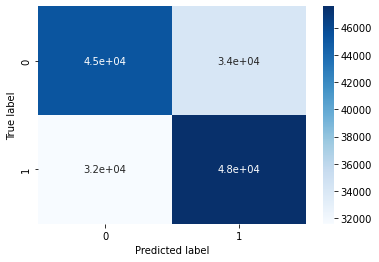

In [ ]:
cm(model = lgbm)

In [ ]:
from xgboost import XGBClassifier


In [ ]:
xgb = XGBClassifier(max_depth=10)
eval(xgb)

              precision    recall  f1-score   support

       False       0.61      0.60      0.60    713744
        True       0.61      0.62      0.62    713611

    accuracy                           0.61   1427355
   macro avg       0.61      0.61      0.61   1427355
weighted avg       0.61      0.61      0.61   1427355

              precision    recall  f1-score   support

       False       0.59      0.57      0.58     79451
        True       0.58      0.60      0.59     79145

    accuracy                           0.59    158596
   macro avg       0.59      0.59      0.59    158596
weighted avg       0.59      0.59      0.59    158596



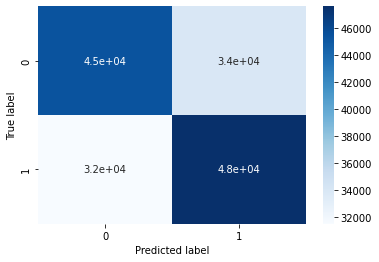

In [ ]:
cm(model = xgb)

In [ ]:
ada= AdaBoostClassifier(learning_rate=.5)
eval(ada)

              precision    recall  f1-score   support

       False       0.58      0.58      0.58    713744
        True       0.58      0.58      0.58    713611

    accuracy                           0.58   1427355
   macro avg       0.58      0.58      0.58   1427355
weighted avg       0.58      0.58      0.58   1427355

              precision    recall  f1-score   support

       False       0.58      0.58      0.58     79451
        True       0.58      0.58      0.58     79145

    accuracy                           0.58    158596
   macro avg       0.58      0.58      0.58    158596
weighted avg       0.58      0.58      0.58    158596



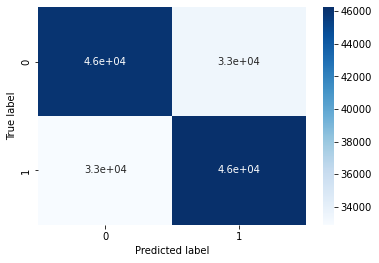

In [ ]:
cm(model = ada)

In [ ]:
eval(RandomForestClassifier())

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     40856
        True       1.00      1.00      1.00     39144

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

              precision    recall  f1-score   support

       False       0.55      0.58      0.56     10242
        True       0.53      0.50      0.51      9758

    accuracy                           0.54     20000
   macro avg       0.54      0.54      0.54     20000
weighted avg       0.54      0.54      0.54     20000



In [ ]:
from pandas import DataFrame
import statsmodels.api as sm

# df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:             clean_loan   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2878.
Date:                Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:34:11   Log-Likelihood:            -1.1340e+06
No. Observations:             1585951   AIC:                         2.268e+06
Df Residuals:                 1585938   BIC:                         2.268e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8385      0.02

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(300, 300), alpha=1e-2)
eval(mlp)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: ignored

In [ ]:
importance = lr.coef_[0]
features = ['zip_code', 'dti', 'fed', 'dow', 'sp', 'treasury', 'unrate', 'vix', 'avg_sentiment', 'major_categories']
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {features[i]}, Score: {v}')

Feature: zip_code, Score: 1.6648672377353116e-05
Feature: dti, Score: -0.0421726009296381
Feature: fed, Score: 0.0029635034228713856
Feature: dow, Score: 0.0004914316982941108
Feature: sp, Score: -0.004880396899357071
Feature: treasury, Score: -0.005255039138819209
Feature: unrate, Score: -0.007513790020975115
Feature: vix, Score: 0.007538074989915707
Feature: avg_sentiment, Score: -3.126046760021279e-05
Feature: major_categories, Score: -0.012586011249147844


gridsearch \\
scaling data  (minmax) \\
try nlog + sqrt



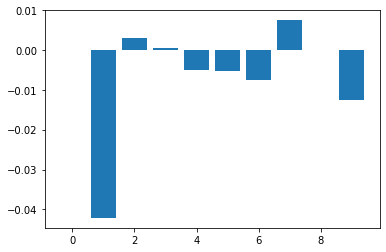

In [ ]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(300, 300), alpha=1e-2)
eval(mlp)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9570
           1       0.50      0.00      0.00     23124
           2       0.33      1.00      0.49     26207
           3       0.00      0.00      0.00     13282
           4       0.00      0.00      0.00      5655
           5       0.00      0.00      0.00      1607
           6       0.00      0.00      0.00       555

    accuracy                           0.33     80000
   macro avg       0.12      0.14      0.07     80000
weighted avg       0.25      0.33      0.16     80000

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2298
           1       0.00      0.00      0.00      5787
           2       0.33      1.00      0.50      6683
           3       0.00      0.00      0.00      3317
           4       0.00      0.00      0.00      1393
           5       0.00      0.00      0.00       404
           6       0.00 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
eval(SVC())

In [ ]:
clf.fit(X_train, y_train)

SVC()

In [ ]:
clf.eval()

In [ ]:
# from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
# X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X, y)


In [ ]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

####Predicting Purpose

In [ ]:
purposes = {
    'debt_consolidation': 0,
    'credit_card': 1,
    'home_improvement': 2,
    'other': 3,
    'major_purchase': 4,
    'medical': 5,
    'car': 6,
    'small_business': 7,
    'vacation': 8,
    'moving': 9,
    'house': 10,
    'renewable_energy': 11,
    'wedding': 12,
    'educational': 13
}

In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
sample_df = df_cleaned_purposes[['zip_code', 'dti', 'fed', 'dow', 'sp', 'treasury', 'unrate', 'vix', 'avg_sentiment', 'major_categories', 'fico_range_avg', 'hardship_flag_num', 'purposes_list']]

In [ ]:
sample_df.head(5)

,zip_code,dti,fed,dow,sp,treasury,unrate,vix,avg_sentiment,major_categories,fico_range_avg,hardship_flag_num,purposes_list
0,190.0,5.91,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,0,677.0,0,1.0
1,577.0,16.06,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,2,717.0,0,0.0
2,605.0,10.78,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,7,697.0,0,0.0
3,76.0,17.06,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,2,787.0,0,1.0
4,174.0,25.37,0.24,17888.35,2102.63,1.24,5.0,14.67,0.057344,2,697.0,0,0.0


In [ ]:
sample_df = sample_df.dropna()

In [ ]:
sample_df['purposes_list'] = to_categorical(sample_df['purposes_list'])

In [ ]:
# X = sample_df[['zip_code', 'dti', 'fed', 'dow', 'sp', 'treasury', 'unrate', 'vix', 'avg_sentiment', 'major_categories', 'fico_range_avg', 'hardship_flag_num']]
# y = sample_df['clean_loan']

In [ ]:
X = sample_df[['zip_code', 'dti', 'fed', 'dow', 'sp', 'treasury', 'unrate', 'vix', 'avg_sentiment', 'major_categories', 'fico_range_avg', 'hardship_flag_num']]
y = sample_df['purposes_list']

In [ ]:
train_data, dev_data, train_y, dev_y = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [ ]:
train_data = list(train_data)
dev_data = list(dev_data)

In [ ]:
train_y = list(train_y)
dev_y = list(dev_y)

In [ ]:
def eval(model):
    model.fit(train_data, train_y)
    train_y_pred = model.predict(train_data)

    # print(np.mean(train_y_pred))
    print(classification_report(train_y, train_y_pred))
    dev_y_pred = model.predict(dev_data)
    print(classification_report(dev_y, dev_y_pred))

In [ ]:
lr = LogisticRegression(solver='liblinear')
eval(lr)

              precision    recall  f1-score   support

         0.0       0.58      0.94      0.71    773295
         1.0       0.55      0.10      0.16    591801

    accuracy                           0.57   1365096
   macro avg       0.56      0.52      0.44   1365096
weighted avg       0.56      0.57      0.47   1365096

              precision    recall  f1-score   support

         0.0       0.58      0.94      0.71    193401
         1.0       0.55      0.10      0.16    147873

    accuracy                           0.57    341274
   macro avg       0.56      0.52      0.44    341274
weighted avg       0.57      0.57      0.48    341274



In [ ]:
from lightgbm import LGBMClassifier


In [ ]:
lgbm = LGBMClassifier()
eval(lgbm)

              precision    recall  f1-score   support

         0.0       0.58      0.91      0.71    773295
         1.0       0.57      0.16      0.25    591801

    accuracy                           0.58   1365096
   macro avg       0.58      0.53      0.48   1365096
weighted avg       0.58      0.58      0.51   1365096

              precision    recall  f1-score   support

         0.0       0.58      0.91      0.71    193401
         1.0       0.57      0.16      0.25    147873

    accuracy                           0.58    341274
   macro avg       0.58      0.53      0.48    341274
weighted avg       0.58      0.58      0.51    341274



In [ ]:
eval(AdaBoostClassifier())

              precision    recall  f1-score   support

         0.0       0.58      0.90      0.71    773295
         1.0       0.55      0.16      0.25    591801

    accuracy                           0.58   1365096
   macro avg       0.57      0.53      0.48   1365096
weighted avg       0.57      0.58      0.51   1365096

              precision    recall  f1-score   support

         0.0       0.58      0.90      0.71    193401
         1.0       0.56      0.16      0.25    147873

    accuracy                           0.58    341274
   macro avg       0.57      0.53      0.48    341274
weighted avg       0.57      0.58      0.51    341274



In [ ]:
from pandas import DataFrame
import statsmodels.api as sm

# df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:             clean_loan   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2878.
Date:                Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:51:52   Log-Likelihood:            -1.1340e+06
No. Observations:             1585951   AIC:                         2.268e+06
Df Residuals:                 1585938   BIC:                         2.268e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8385      0.02

In [ ]:
importance = lr.coef_[0]
features = ['zip_code', 'dti', 'fed', 'dow', 'sp', 'treasury', 'unrate', 'vix', 'avg_sentiment', 'major_categories', 'fico_range_avg', 'hardship_flag_num']
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {features[i]}, Score: {v}')

Feature: zip_code, Score: 1.6690699991796177e-05
Feature: dti, Score: 0.012929674985010154
Feature: fed, Score: -0.08307726637740527
Feature: dow, Score: -1.7065317220821805e-05
Feature: sp, Score: 0.0005614802312919267
Feature: treasury, Score: -0.008471847036790183
Feature: unrate, Score: 0.11518720751214585
Feature: vix, Score: 0.017384899944655512
Feature: avg_sentiment, Score: 0.606270508561868
Feature: major_categories, Score: -0.09861107953826094
Feature: fico_range_avg, Score: 0.00526367150157581
Feature: hardship_flag_num, Score: 1.0256213703397237


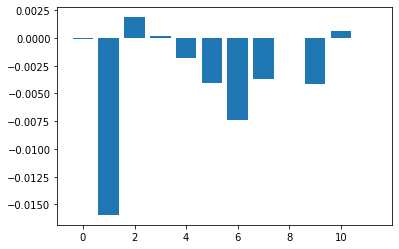

In [ ]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(300, 300), alpha=1e-2)
eval(mlp)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9570
           1       0.50      0.00      0.00     23124
           2       0.33      1.00      0.49     26207
           3       0.00      0.00      0.00     13282
           4       0.00      0.00      0.00      5655
           5       0.00      0.00      0.00      1607
           6       0.00      0.00      0.00       555

    accuracy                           0.33     80000
   macro avg       0.12      0.14      0.07     80000
weighted avg       0.25      0.33      0.16     80000

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2298
           1       0.00      0.00      0.00      5787
           2       0.33      1.00      0.50      6683
           3       0.00      0.00      0.00      3317
           4       0.00      0.00      0.00      1393
           5       0.00      0.00      0.00       404
           6       0.00 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
eval(SVC())

In [ ]:
clf.fit(X_train, y_train)

SVC()

In [ ]:
clf.eval()

In [ ]:
# from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
# X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X, y)


In [ ]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])